# Welcome to the FIFA Money Ball analysis :)

# Import libraries

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


# Import data

In [2]:
data = pd.read_csv('/Users/ritasilva/Downloads/Project_FIFA_MoneyBall-main/Data/fifa21_male2.csv')

In [3]:
data.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  ...  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png  ...   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png  ...   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png  ...   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png  ...   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png  ...   

     CDM    RDM    RWB     LB   LCB    CB   RCB     RB    GK Gender  
0  70+-1  70+-1  71+-2  70+-1  69+0  69+0  69+0  70+-1  17+0   Male  
1   66+1   66+1   62+1   60+1  60+1  60+1  60+1   60+1  17+1   Male  
2   54+0   54+0   52+0   47+0  46+0  46+0  46+0   47+0  15+0   Male  
3   65+0   65+0   56+0   57+0  51+0  51+0  51+0   57+0  22+0   Male  
4   73+3   73+3   70+3   67+3  64+3  64+3  64+3   67+3  17+3   Male  

[5 rows x 107 columns]

# Explore data

In [4]:
data.dtypes[1:60]

Name                 object
Age                   int64
OVA                   int64
Nationality          object
Club                 object
BOV                   int64
BP                   object
Position             object
Player Photo         object
Club Logo            object
Flag Photo           object
POT                   int64
Team & Contract      object
Height               object
Weight               object
foot                 object
Growth                int64
Joined               object
Loan Date End        object
Value                object
Wage                 object
Release Clause       object
Contract             object
Attacking             int64
Crossing              int64
Finishing             int64
Heading Accuracy      int64
Short Passing         int64
Volleys             float64
Skill                 int64
Dribbling             int64
Curve               float64
FK Accuracy           int64
Long Passing          int64
Ball Control          int64
Movement            

In [6]:
data.dtypes[60:107]

GK Diving          int64
GK Handling        int64
GK Kicking         int64
GK Positioning     int64
GK Reflexes        int64
Total Stats        int64
Base Stats         int64
W/F               object
SM                object
A/W               object
D/W               object
IR                object
PAC                int64
SHO                int64
PAS                int64
DRI                int64
DEF                int64
PHY                int64
Hits              object
LS                object
ST                object
RS                object
LW                object
LF                object
CF                object
RF                object
RW                object
LAM               object
CAM               object
RAM               object
LM                object
LCM               object
CM                object
RCM               object
RM                object
LWB               object
LDM               object
CDM               object
RDM               object
RWB               object


In [5]:
data.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

In [6]:
#Cleaning col names: removing spaces and upper cases

data.columns = [column.lower().replace(' ', '_') for column in data.columns]
data.head()

id         name  age  ova            nationality           club  bov   bp  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       position                                       player_photo  ...  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png  ...   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png  ...   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png  ...   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png  ...   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png  ...   

     cdm    rdm    rwb     lb   lcb    cb   rcb     rb    gk gender  
0  70+-1  70+-1  71+-2  70+-1  69+0  69+0  69+0  70+-1  17+0   Male  
1   66+1   66+1   62+1   60+1  60+1  60+1  60+1   60+1  17+1   Male  
2   54+0   54+0   52+0   47+0  46+0  46+0  46+0   47+0  15+0   Male  
3   65+0   65+0   56+0   57+0  51+0  51+0  51+0   57+0  22+0   Male  
4   73+3   73+3   70+3   67+3  64+3  64+3  64+3   67+3  17+3   Male  

[5 rows x 107 columns]

In [9]:
#Checking for null values

data.isnull().sum()[1:40]

name                    0
age                     0
ova                     0
nationality             0
club                   23
bov                     0
bp                      0
position              413
player_photo            0
club_logo              23
flag_photo              0
pot                     0
team_&_contract         0
height                  0
weight                  0
foot                    0
growth                  0
joined                 58
loan_date_end       16215
value                   0
wage                    0
release_clause          0
contract                0
attacking               0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                58
skill                   0
dribbling               0
curve                  58
fk_accuracy             0
long_passing            0
ball_control            0
movement                0
acceleration            0
sprint_speed            0
agility     

In [7]:
data.isnull().sum()[40:80]

reactions            0
balance             58
power                0
shot_power           0
jumping             58
stamina              0
strength             0
long_shots           0
mentality            0
aggression           0
interceptions        7
positioning          7
vision              58
penalties            0
composure          423
defending            0
marking              0
standing_tackle      0
sliding_tackle      58
goalkeeping          0
gk_diving            0
gk_handling          0
gk_kicking           0
gk_positioning       0
gk_reflexes          0
total_stats          0
base_stats           0
w/f                  0
sm                   0
a/w                 89
d/w                 89
ir                   0
pac                  0
sho                  0
pas                  0
dri                  0
def                  0
phy                  0
hits                 0
ls                   0
dtype: int64

In [8]:
data.isnull().sum()[80:107]

st        0
rs        0
lw        0
lf        0
cf        0
rf        0
rw        0
lam       0
cam       0
ram       0
lm        0
lcm       0
cm        0
rcm       0
rm        0
lwb       0
ldm       0
cdm       0
rdm       0
rwb       0
lb        0
lcb       0
cb        0
rcb       0
rb        0
gk        0
gender    0
dtype: int64

In [9]:
#Dropping cols loan date end, player_photo , club logo, flag photo, team & contract, position
#'LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM',
#'CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK','Gender'
#as I don't need this columns

data = data.drop(['loan_date_end','player_photo','club_logo','flag_photo','team_&_contract','position'], axis =1)

In [10]:
data = data.drop(['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk','gender'], axis=1)

In [11]:
data = data.drop(['id'], axis=1)

In [12]:
#Cleaning empty values in col composure, replacing by the mean otherwise I would drop too much data

composure_mean = data['composure'].mean()
data['composure'] = data['composure'].fillna(composure_mean)

In [13]:
data['composure'].isnull().sum()

0

In [14]:
#Dropping remaining null values

data = data.dropna()

In [15]:
#Cleaning value, wage, release_clause cols

data[['value', 'wage', 'release_clause']]

value  wage release_clause
0      €625K   €7K             €0
1      €600K   €7K          €1.1M
2      €1.1M  €15K             €0
4      €5.5M  €12K          €7.2M
5      €725K   €5K             €0
...      ...   ...            ...
17120  €550K   €2K             €0
17121  €130K   €3K          €273K
17122  €130K   €2K          €273K
17123  €475K   €3K          €784K
17124  €325K   €2K          €788K

[17018 rows x 3 columns]

In [16]:
#Removing € symbol

data['value'] = data['value'].apply(lambda x: (str(x).replace('€', '')))
data['wage'] = data['wage'].apply(lambda x: (str(x).replace('€', '')))
data['release_clause'] = data['release_clause'].apply(lambda x: (str(x).replace('€', '')))

In [45]:
# Cleaning currencies K and M into float

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if '0' in x:
        return 0
    
data['value'] = data['value'].apply(value_to_float)
data['wage'] = data['wage'].apply(value_to_float)
data['release_clause'] = data['release_clause'].apply(value_to_float)

In [18]:
data[['value', 'wage', 'release_clause']]

value     wage  release_clause
0       625000.0   7000.0             0.0
1       600000.0   7000.0       1100000.0
2      1100000.0  15000.0             0.0
4      5500000.0  12000.0       7200000.0
5       725000.0   5000.0             0.0
...          ...      ...             ...
17120   550000.0   2000.0             0.0
17121   130000.0   3000.0        273000.0
17122   130000.0   2000.0        273000.0
17123   475000.0   3000.0        784000.0
17124   325000.0   2000.0        788000.0

[17018 rows x 3 columns]

In [19]:
#Cleaning weight: removing ibs from weight and converting it to KG

def clean_weight(x):
    if 'lbs' in str(x):
        x = str(x).replace('lbs','')
        x = float(x) * 0.454
    return float(x)
    

In [20]:
data['weight'] = data['weight'].apply(clean_weight)
data['weight']

0        82.174
1        64.922
2        73.094
4        68.100
5        74.002
          ...  
17120    74.910
17121    77.180
17122    69.916
17123    67.192
17124    69.916
Name: weight, Length: 17018, dtype: float64

In [25]:
# Cleaning height: converting inch to cm

data['height'] = data['height'].str.replace('"','')
data['height'] = data['height'].apply(lambda x: int(x.split("'")[0])*30.48 + int(x.split("'")[1])*2.54)
data['height']

0        182.88
1        177.80
2        175.26
4        170.18
5        172.72
          ...  
17120    198.12
17121    177.80
17122    175.26
17123    175.26
17124    177.80
Name: height, Length: 17018, dtype: float64

In [26]:
data.describe().apply(lambda x: round(x,2))

age       ova       bov       pot    height    weight    growth  \
count  17018.00  17018.00  17018.00  17018.00  17018.00  17018.00  17018.00   
mean      25.24     66.95     67.89     72.47    181.22     75.20      5.52   
std        4.92      6.84      6.61      5.73      6.89      7.18      5.79   
min       16.00     45.00     44.00     47.00    154.94     49.94      0.00   
25%       21.00     62.00     64.00     69.00    175.26     69.92      0.00   
50%       25.00     67.00     68.00     72.00    180.34     74.91      4.00   
75%       29.00     72.00     72.00     76.00    185.42     79.90      9.00   
max       53.00     93.00     93.00     95.00    205.74    110.32     26.00   

              value       wage  release_clause  ...  gk_positioning  \
count  1.701800e+04   17018.00    1.701800e+04  ...        17018.00   
mean   2.583519e+06   10502.59    4.603207e+06  ...           15.47   
std    5.385616e+06   21241.78    1.036453e+07  ...           16.37   
min    0.000000e+00       0.00    0.000000e+00  ...            1.00   
25%    3.750000e+05    1000.00    5.250000e+05  ...            8.00   
50%    8.000000e+05    3000.00    1.300000e+06  ...           11.00   
75%    2.400000e+06   11000.00    3.900000e+06  ...           14.00   
max    1.055000e+08  560000.00    2.031000e+08  ...           91.00   

       gk_reflexes  total_stats  base_stats       pac       sho       pas  \
count     17018.00     17018.00    17018.00  17018.00  17018.00  17018.00   
mean         15.70      1632.29      361.31     68.09     54.94     58.91   
std          17.12       259.86       40.18     11.15     13.86     10.17   
min           1.00       731.00      228.00     25.00     16.00     25.00   
25%           8.00      1494.00      333.00     62.00     46.00     52.00   
50%          11.00      1660.00      362.00     69.00     58.00     60.00   
75%          14.00      1812.00      389.00     75.00     65.00     66.00   
max          90.00      2316.00      498.00     96.00     93.00     93.00   

            dri       def       phy  
count  17018.00  17018.00  17018.00  
mean      64.20     50.27     64.90  
std        9.82     16.84      9.65  
min       28.00     12.00     27.00  
25%       59.00     35.00     59.00  
50%       65.00     53.00     66.00  
75%       71.00     64.00     72.00  
max       95.00     91.00     91.00  

[8 rows x 59 columns]

# Question 1

What's the distribution of wage vs value of the top players? 
With top players I am considering the ones with overall rating (ova) greater than 80

In [50]:
dist_wv = data[['name','club','nationality','age','wage','value','bp', 'ova']][data['ova']>80]
fig=px.scatter(dist_wv,x='value',y='wage',color='age',size='wage',
               hover_data=['name','club','nationality','age','wage','value','bp', 'ova'],
               title='Distribution of Value vs Wage of Players with high OVA (>80)')
fig.show()


# Question 2

What are the emerging talents? Top 10 players under 21, ranked by potential.

In [28]:
pot_players = data[['pot','name','club','nationality','age','wage','value','bp', 'ova']][data['age']<=21]
pot_players.sort_values(by='pot', ascending=False,inplace=True)
top_20_pot = pot_players[:10]                       


fig = px.bar(top_20_pot, x='pot', y='name', color='value', orientation='h',
             hover_data=['name', 'age', 'pot', 'value'],
             height=600,
             title='Top 10 players under 21')
fig.show()

# Question 3

#Distribution of the weight and height vs stamina of all players

In [43]:
dist_whs = data[['name','club','nationality','age','stamina','weight','height', 'ova']]
fig=px.scatter(dist_whs,x='weight',y='height',color='stamina',size='age',
               hover_data=['name','club','nationality','age','weight','height','stamina','ova'],
               title='Distribution of weight & height vs stamina')
fig.show()



# EDA

In [32]:
data.describe().apply(lambda x: round(x,2))

age       ova       bov       pot    height    weight    growth  \
count  17018.00  17018.00  17018.00  17018.00  17018.00  17018.00  17018.00   
mean      25.24     66.95     67.89     72.47    181.22     75.20      5.52   
std        4.92      6.84      6.61      5.73      6.89      7.18      5.79   
min       16.00     45.00     44.00     47.00    154.94     49.94      0.00   
25%       21.00     62.00     64.00     69.00    175.26     69.92      0.00   
50%       25.00     67.00     68.00     72.00    180.34     74.91      4.00   
75%       29.00     72.00     72.00     76.00    185.42     79.90      9.00   
max       53.00     93.00     93.00     95.00    205.74    110.32     26.00   

              value       wage  release_clause  ...  gk_positioning  \
count  1.701800e+04   17018.00    1.701800e+04  ...        17018.00   
mean   2.583519e+06   10502.59    4.603207e+06  ...           15.47   
std    5.385616e+06   21241.78    1.036453e+07  ...           16.37   
min    0.000000e+00       0.00    0.000000e+00  ...            1.00   
25%    3.750000e+05    1000.00    5.250000e+05  ...            8.00   
50%    8.000000e+05    3000.00    1.300000e+06  ...           11.00   
75%    2.400000e+06   11000.00    3.900000e+06  ...           14.00   
max    1.055000e+08  560000.00    2.031000e+08  ...           91.00   

       gk_reflexes  total_stats  base_stats       pac       sho       pas  \
count     17018.00     17018.00    17018.00  17018.00  17018.00  17018.00   
mean         15.70      1632.29      361.31     68.09     54.94     58.91   
std          17.12       259.86       40.18     11.15     13.86     10.17   
min           1.00       731.00      228.00     25.00     16.00     25.00   
25%           8.00      1494.00      333.00     62.00     46.00     52.00   
50%          11.00      1660.00      362.00     69.00     58.00     60.00   
75%          14.00      1812.00      389.00     75.00     65.00     66.00   
max          90.00      2316.00      498.00     96.00     93.00     93.00   

            dri       def       phy  
count  17018.00  17018.00  17018.00  
mean      64.20     50.27     64.90  
std        9.82     16.84      9.65  
min       28.00     12.00     27.00  
25%       59.00     35.00     59.00  
50%       65.00     53.00     66.00  
75%       71.00     64.00     72.00  
max       95.00     91.00     91.00  

[8 rows x 59 columns]

In [33]:
data.select_dtypes(np.number)

age  ova  bov  pot  height  weight  growth      value     wage  \
0       33   69   71   69  182.88  82.174       0   625000.0   7000.0   
1       37   71   70   71  177.80  64.922       0   600000.0   7000.0   
2       33   71   71   71  175.26  73.094       0  1100000.0  15000.0   
4       36   81   82   81  170.18  68.100       0  5500000.0  12000.0   
5       27   66   66   70  172.72  74.002       4   725000.0   5000.0   
...    ...  ...  ...  ...     ...     ...     ...        ...      ...   
17120   22   64   66   69  198.12  74.910       5   550000.0   2000.0   
17121   18   56   58   66  177.80  77.180      10   130000.0   3000.0   
17122   18   56   56   67  175.26  69.916      11   130000.0   2000.0   
17123   20   62   62   73  175.26  67.192      11   475000.0   3000.0   
17124   18   59   61   74  177.80  69.916      15   325000.0   2000.0   

       release_clause  ...  gk_positioning  gk_reflexes  total_stats  \
0                 0.0  ...              10           12         1929   
1           1100000.0  ...              11           11         1906   
2                 0.0  ...              16            7         1770   
4           7200000.0  ...              13            7         2014   
5                 0.0  ...               9            9         1649   
...               ...  ...             ...          ...          ...   
17120             0.0  ...               5            7         1367   
17121        273000.0  ...              12           11         1529   
17122        273000.0  ...              12            8         1430   
17123        784000.0  ...               6            9         1579   
17124        788000.0  ...              15            9         1401   

       base_stats  pac  sho  pas  dri  def  phy  
0             408   71   59   70   71   68   69  
1             385   53   69   73   69   58   63  
2             354   45   68   76   77   36   52  
4             420   58   70   85   85   63   59  
5             360   91   56   56   67   27   63  
...           ...  ...  ...  ...  ...  ...  ...  
17120         302   54   30   37   48   64   69  
17121         319   62   46   57   56   43   55  
17122         303   63   35   44   52   54   55  
17123         335   71   34   58   59   59   54  
17124         295   70   62   41   57   16   49  

[17018 rows x 59 columns]

In [39]:
list(data.columns)

['name',
 'age',
 'ova',
 'nationality',
 'club',
 'bov',
 'bp',
 'pot',
 'height',
 'weight',
 'foot',
 'growth',
 'joined',
 'value',
 'wage',
 'release_clause',
 'contract',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'w/f',
 'sm',
 'a/w',
 'd/w',
 'ir',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 'hits']

#I will create a dataframe with the variables I want to use in my model

In [34]:
df_model = data[['ova','pot','value', 'wage', 'height', 'weight', 'age', 'skill','def','mentality', 'pas','phy', 'sho','goalkeeping']]

In [35]:
df_model

ova  pot      value     wage  height  weight  age  skill  def  \
0       69   69   625000.0   7000.0  182.88  82.174   33    338   68   
1       71   71   600000.0   7000.0  177.80  64.922   37    369   58   
2       71   71  1100000.0  15000.0  175.26  73.094   33    387   36   
4       81   81  5500000.0  12000.0  170.18  68.100   36    408   63   
5       66   70   725000.0   5000.0  172.72  74.002   27    276   27   
...    ...  ...        ...      ...     ...     ...  ...    ...  ...   
17120   64   69   550000.0   2000.0  198.12  74.910   22    193   64   
17121   56   66   130000.0   3000.0  177.80  77.180   18    264   43   
17122   56   67   130000.0   2000.0  175.26  69.916   18    212   54   
17123   62   73   475000.0   3000.0  175.26  67.192   20    258   59   
17124   59   74   325000.0   2000.0  177.80  69.916   18    235   16   

       mentality  pas  phy  sho  goalkeeping  
0            320   70   69   59           56  
1            362   73   63   69           56  
2            317   76   52   68           51  
4            370   85   59   70           45  
5            256   56   63   56           46  
...          ...  ...  ...  ...          ...  
17120        218   37   69   30           39  
17121        259   57   55   46           57  
17122        256   44   55   35           40  
17123        257   58   54   34           51  
17124        224   41   49   62           48  

[17018 rows x 14 columns]

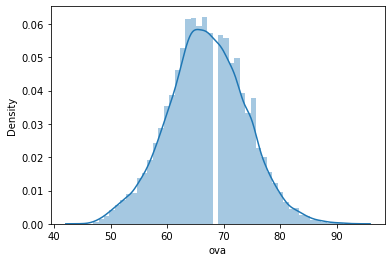

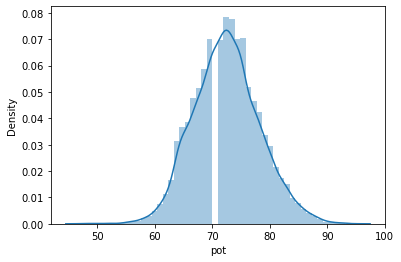

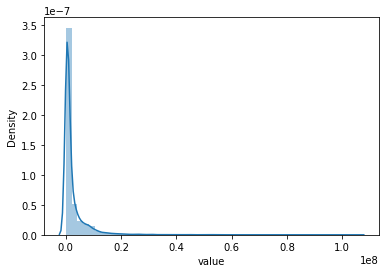

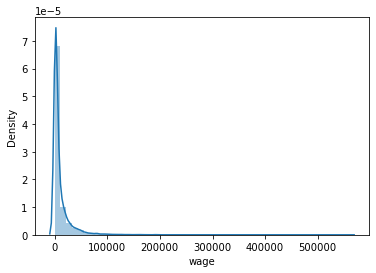

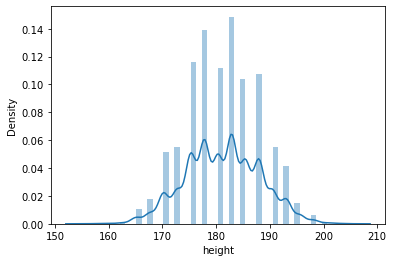

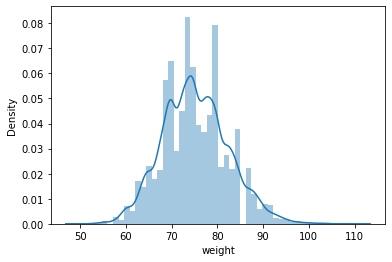

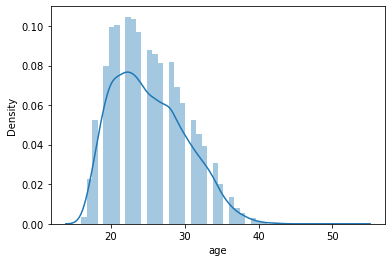

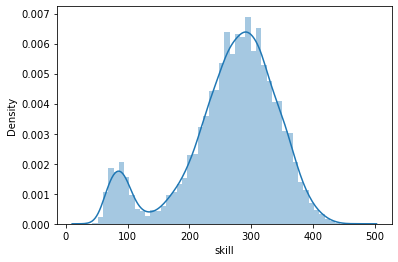

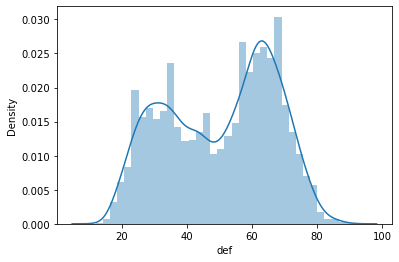

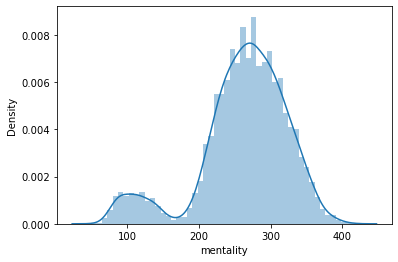

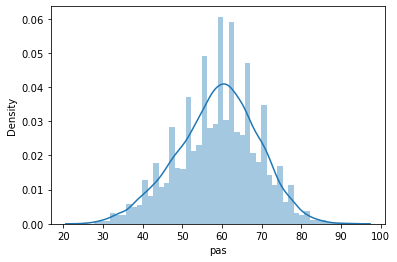

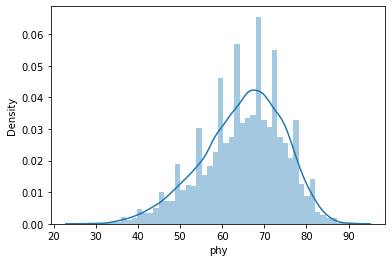

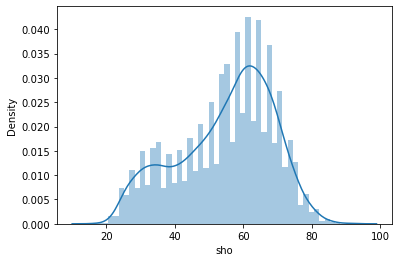

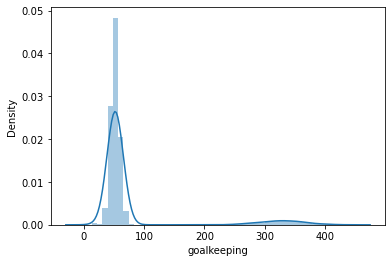

In [36]:
for column in df_model.select_dtypes(np.number).columns:
    sns.distplot(df_model[column])
    plt.show()

In [37]:
corr_df_model = df_model.select_dtypes([np.number])
correlations_matrix = corr_df_model.corr()  # method='spearman'
correlations_matrix

ova       pot     value      wage    height    weight  \
ova          1.000000  0.586998  0.637729  0.601380  0.024202  0.149425   
pot          0.586998  1.000000  0.571759  0.469672 -0.024909 -0.045119   
value        0.637729  0.571759  1.000000  0.822169 -0.000255  0.041253   
wage         0.601380  0.469672  0.822169  1.000000  0.021182  0.070341   
height       0.024202 -0.024909 -0.000255  0.021182  1.000000  0.765752   
weight       0.149425 -0.045119  0.041253  0.070341  0.765752  1.000000   
age          0.515203 -0.254364  0.099739  0.207813  0.090230  0.255948   
skill        0.443437  0.265978  0.301100  0.295932 -0.456477 -0.356965   
def          0.343953  0.167743  0.173633  0.193528  0.093969  0.103905   
mentality    0.495267  0.240950  0.307544  0.319237 -0.306098 -0.204822   
pas          0.699207  0.391836  0.447829  0.424625 -0.211034 -0.101640   
phy          0.542379  0.155115  0.268268  0.264623  0.441369  0.536896   
sho          0.486590  0.241131  0.326318  0.298069 -0.096085  0.007087   
goalkeeping  0.037244 -0.008985  0.003170 -0.011021  0.348577  0.327175   

                  age     skill       def  mentality       pas       phy  \
ova          0.515203  0.443437  0.343953   0.495267  0.699207  0.542379   
pot         -0.254364  0.265978  0.167743   0.240950  0.391836  0.155115   
value        0.099739  0.301100  0.173633   0.307544  0.447829  0.268268   
wage         0.207813  0.295932  0.193528   0.319237  0.424625  0.264623   
height       0.090230 -0.456477  0.093969  -0.306098 -0.211034  0.441369   
weight       0.255948 -0.356965  0.103905  -0.204822 -0.101640  0.536896   
age          1.000000  0.171351  0.222239   0.273655  0.394220  0.436001   
skill        0.171351  1.000000  0.175036   0.886179  0.517812  0.029954   
def          0.222239  0.175036  1.000000   0.434500  0.141470  0.512761   
mentality    0.273655  0.886179  0.434500   1.000000  0.409164  0.311769   
pas          0.394220  0.517812  0.141470   0.409164  1.000000  0.171393   
phy          0.436001  0.029954  0.512761   0.311769  0.171393  1.000000   
sho          0.307946  0.328224 -0.418082   0.187857  0.659179  0.049934   
goalkeeping  0.123917 -0.714174 -0.205241  -0.729485  0.172044  0.059808   

                  sho  goalkeeping  
ova          0.486590     0.037244  
pot          0.241131    -0.008985  
value        0.326318     0.003170  
wage         0.298069    -0.011021  
height      -0.096085     0.348577  
weight       0.007087     0.327175  
age          0.307946     0.123917  
skill        0.328224    -0.714174  
def         -0.418082    -0.205241  
mentality    0.187857    -0.729485  
pas          0.659179     0.172044  
phy          0.049934     0.059808  
sho          1.000000     0.248135  
goalkeeping  0.248135     1.000000

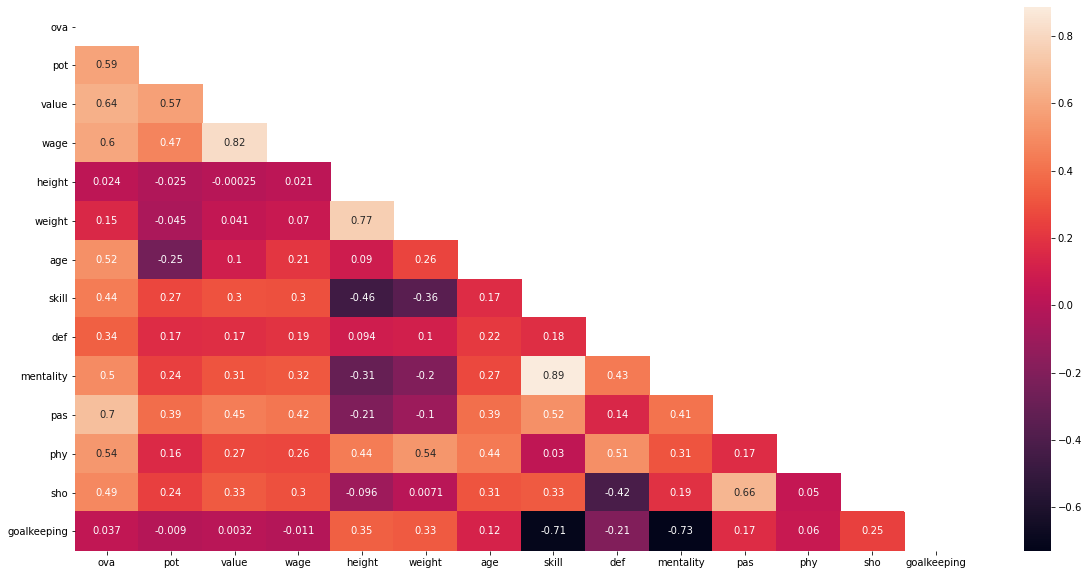

In [44]:
# check the correlations

mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

# from this you can remove multicolinearity > 0.9 with no worry...
## ... > 0.75 is better to check with the model metrics to be sure
### when removing, keep the ones that have the highest correlation with target

In [38]:
#Transforming the data


def boxcox_transform(df):
    numeric_cols = df_model.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df_model[column] = np.where(df_model[column]<=0, np.NAN, df_model[column]) 
        df_model[column] = df_model[column].fillna(df_model[column].mean())
        transformed_data, ci = stats.boxcox(df_model[column])
        df_model[column] = transformed_data
        _ci[column] = [ci] 
    return df_model, _ci

In [39]:
df_model, _ci = boxcox_transform(df_model)
df_model

ova        pot     value      wage      height    weight  \
0      57.034857  13.063354  8.982569  6.764130  120.534011  5.692317   
1      58.627070  13.264875  8.965131  6.764130  117.482332  5.312294   
2      58.627070  13.264875  9.219433  7.186970  115.953297  5.502242   
4      66.553385  14.229250  9.848803  7.065290  112.888665  5.388560   
5      54.641863  13.164503  9.045586  6.570809  114.422086  5.522166   
...          ...        ...       ...       ...         ...       ...   
17120  53.043304  13.063354  8.927812  6.022819  129.640185  5.541874   
17121  46.621281  12.755063  8.277990  6.269264  117.482332  5.590231   
17122  46.621281  12.858652  8.277990  6.022819  115.953297  5.430731   
17123  51.442060  13.463353  8.864462  6.269264  115.953297  5.367098   
17124  49.034961  13.561490  8.697698  6.022819  117.482332  5.430731   

            age         skill        def     mentality         pas  \
0      2.342709  21594.821552  77.529857  69895.605015  290.900975   
1      2.390326  25326.457343  65.517979  90100.627015  308.780777   
2      2.342709  27615.134666  39.441358  68553.086851  326.970504   
4      2.379044  30397.184616  71.513360  94248.477192  383.329540   
5      2.255876  14944.652278  28.958306  44147.911418  211.800472   
...         ...           ...        ...           ...         ...   
17120  2.162713   7803.455622  72.715021  31712.023570  117.363693   
17121  2.066746  13785.362208  47.677650  45219.776694  217.201743   
17122  2.066746   9254.709346  60.738037  44147.911418  150.249759   
17123  2.117725  13221.535467  66.715286  44503.730505  222.642778   
17124  2.066746  11158.847303  16.364535  33535.369399  135.865186   

               phy         sho  goalkeeping  
0      3020.942308  467.966405     1.027305  
1      2503.765452  603.975321     1.027305  
2      1684.878121  589.778454     1.025189  
4      2186.700033  618.301924     1.022046  
5      2503.765452  429.808320     1.022626  
...            ...         ...          ...  
17120  3020.942308  155.229609     1.017962  
17121  1891.702817  311.881054     1.027685  
17122  1891.702817  199.674486     1.018726  
17123  1821.390265  190.443943     1.025189  
17124  1490.367379  507.362321     1.023714  

[17018 rows x 14 columns]

In [40]:
#Function to remove outliers

def remove_outliers(df_model, threshold=1.5, in_columns=df_model.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df_model[column],75)
            lower = np.percentile(df_model[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            df_model = df_model[(df_model[column]>lower_limit) & (df_model[column]<upper_limit)]
    return df_model

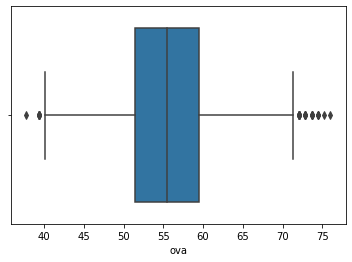

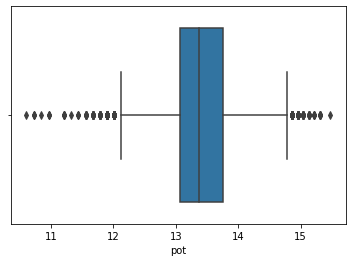

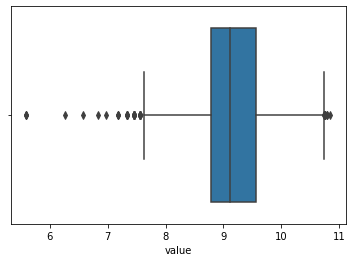

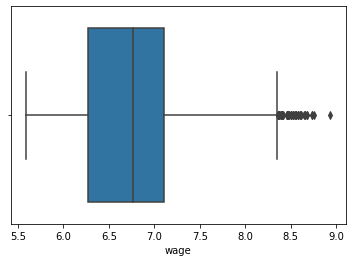

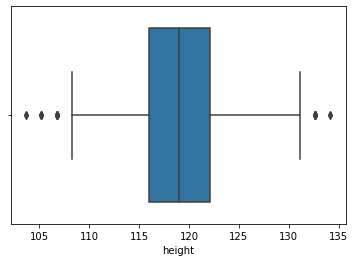

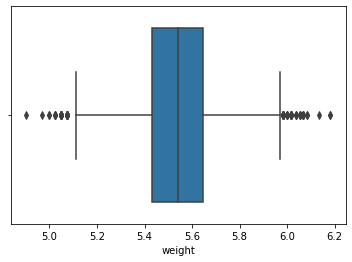

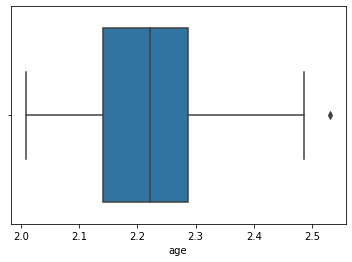

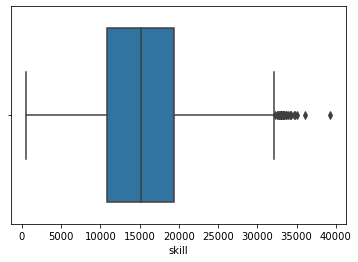

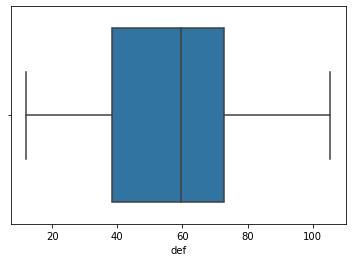

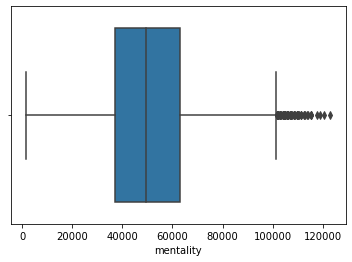

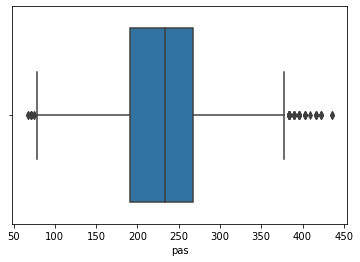

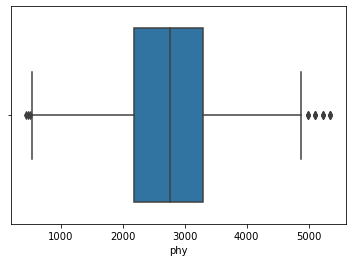

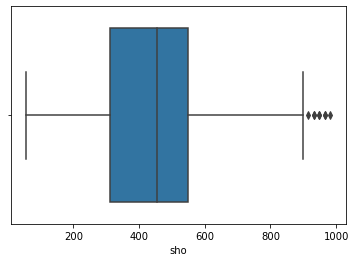

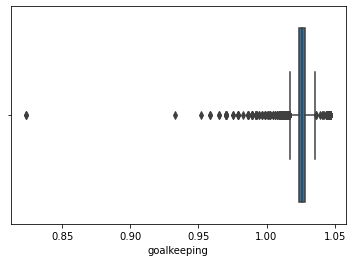

In [41]:
#Checking in which variables to remove outliers

for column in df_model.select_dtypes(np.number).columns:
    sns.boxplot(df_model[column])
    plt.show()
    
    

In [49]:
# Removing outliers. Skipped age and defense as there's wasn't many outliers

dfm1 = df_model.copy()

dfm1 = remove_outliers(dfm1, threshold=1.5, skip_columns=['age', 'def']) 
dfm1

ova        pot     value      wage      height    weight  \
0      57.034857  13.063354  8.982569  6.764130  120.534011  5.692317   
1      58.627070  13.264875  8.965131  6.764130  117.482332  5.312294   
2      58.627070  13.264875  9.219433  7.186970  115.953297  5.502242   
5      54.641863  13.164503  9.045586  6.570809  114.422086  5.522166   
10     61.010901  13.561490  8.240147  6.764130  119.009226  5.571042   
...          ...        ...       ...       ...         ...       ...   
17120  53.043304  13.063354  8.927812  6.022819  129.640185  5.541874   
17121  46.621281  12.755063  8.277990  6.269264  117.482332  5.590231   
17122  46.621281  12.858652  8.277990  6.022819  115.953297  5.430731   
17123  51.442060  13.463353  8.864462  6.269264  115.953297  5.367098   
17124  49.034961  13.561490  8.697698  6.022819  117.482332  5.430731   

            age         skill        def     mentality         pas  \
0      2.342709  21594.821552  77.529857  69895.605015  290.900975   
1      2.390326  25326.457343  65.517979  90100.627015  308.780777   
2      2.342709  27615.134666  39.441358  68553.086851  326.970504   
5      2.255876  14944.652278  28.958306  44147.911418  211.800472   
10     2.367366  15640.274768  87.196535  76809.270341  273.338761   
...         ...           ...        ...           ...         ...   
17120  2.162713   7803.455622  72.715021  31712.023570  117.363693   
17121  2.066746  13785.362208  47.677650  45219.776694  217.201743   
17122  2.066746   9254.709346  60.738037  44147.911418  150.249759   
17123  2.117725  13221.535467  66.715286  44503.730505  222.642778   
17124  2.066746  11158.847303  16.364535  33535.369399  135.865186   

               phy         sho  goalkeeping  
0      3020.942308  467.966405     1.027305  
1      2503.765452  603.975321     1.027305  
2      1684.878121  589.778454     1.025189  
5      2503.765452  429.808320     1.022626  
10     3298.319982  392.912366     1.019453  
...            ...         ...          ...  
17120  3020.942308  155.229609     1.017962  
17121  1891.702817  311.881054     1.027685  
17122  1891.702817  199.674486     1.018726  
17123  1821.390265  190.443943     1.025189  
17124  1490.367379  507.362321     1.023714  

[14643 rows x 14 columns]

In [50]:
# splitting  data

X = dfm1.drop('value', axis=1)
y = dfm1['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [51]:
#Fitting the model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
predictions = model.predict(X_test)

In [53]:

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9394445840189201, 0.07911335713603732, 0.128182853385919)

In [54]:
model.coef_

array([ 1.10608938e-01, -1.74592216e-02,  3.21673859e-02,  5.14952294e-04,
       -5.48336693e-02, -1.97356525e+00,  7.84687149e-07, -5.11538467e-04,
       -1.25895399e-06,  1.74981811e-04,  2.28456288e-05,  9.70913997e-05,
        6.48830452e-01])

In [55]:
# MAE and MSE are log transformed
# have to inverse transform
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['value'])

In [56]:
mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(2592050.2323751147, 6253307.462014977)

In [57]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['value'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

true          pred          resid
11652   750000.0  5.937547e+05  156245.343556
7800   3700000.0  3.062442e+06  637557.634120
2265    425000.0  3.599799e+05   65020.142327
12877  2500000.0  2.161696e+06  338304.498743
14605   800000.0  9.726267e+05  172626.668561
...          ...           ...            ...
2339    350000.0  2.777399e+05   72260.061981
4109   2800000.0  2.289040e+06  510960.238684
3826    675000.0  7.442118e+05   69211.846348
3362    575000.0  5.088346e+05   66165.405722
13512   875000.0  8.153168e+05   59683.236487

[2929 rows x 3 columns]